In [1]:
pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist_train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

_,m_train = X_train.shape

In [4]:
Y_train

array([5, 5, 1, ..., 2, 7, 0], shape=(12999,))

In [5]:
def initialParameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [6]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))

    return A

In [7]:




def forwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0


In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [9]:
def backwardPropogation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [10]:
def updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [11]:
def getPredictions(A2):
    return np.argmax(A2, 0)

def getAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


In [12]:
def gradientDescent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialParameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwardPropogation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = getPredictions(A2)
            print(getAccuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradientDescent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 4 5 ... 4 7 9] [5 5 1 ... 2 7 0]
0.09531502423263329
Iteration:  10
[5 4 5 ... 2 7 9] [5 5 1 ... 2 7 0]
0.23355642741749366
Iteration:  20
[5 4 6 ... 2 7 9] [5 5 1 ... 2 7 0]
0.30210016155088854
Iteration:  30
[5 7 6 ... 2 7 0] [5 5 1 ... 2 7 0]
0.3728748365258866
Iteration:  40
[5 7 6 ... 2 7 0] [5 5 1 ... 2 7 0]
0.436802830986999
Iteration:  50
[5 4 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.4951919378413724
Iteration:  60
[5 4 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.540964689591507
Iteration:  70
[8 9 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.5811216247403647
Iteration:  80
[8 9 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.6088160627740595
Iteration:  90
[8 9 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.6335871990153089
Iteration:  100
[8 9 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.6503577198246019
Iteration:  110
[8 9 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.6675128856065852
Iteration:  120
[8 9 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.6799753827217478
Iteration:  130
[8 8 3 ... 2 7 0] [5 5 1 ... 2 7 0]
0.6926686668205246
Iteration:  140


In [14]:
def makePredictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropagation(W1, b1, W2, b2, X)
    predictions = getPredictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    currentImage = X_train[:, index, None]
    prediction = makePredictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    currentImage = currentImage.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(currentImage, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


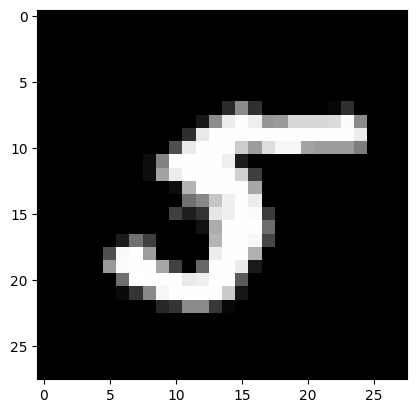

Prediction:  [5]
Label:  5


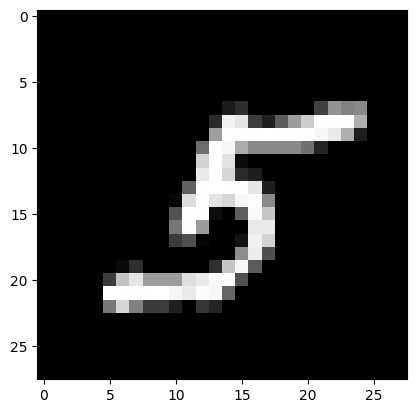

Prediction:  [8]
Label:  1


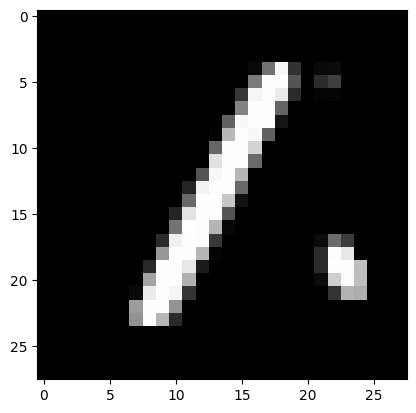

Prediction:  [9]
Label:  9


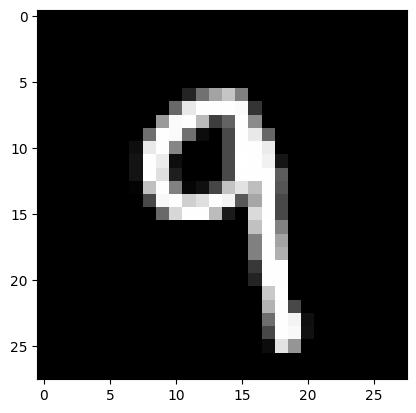

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [18]:
dev_predictions = makePredictions(X_dev, W1, b1, W2, b2)
getAccuracy(dev_predictions, Y_dev)

[6 9 5 9 3 1 5 0 6 1 4 3 6 5 4 1 1 5 4 8 9 7 7 7 8 3 5 7 6 0 6 9 0 7 1 8 1
 2 0 0 1 6 3 4 4 9 5 6 2 3 3 7 0 0 7 9 5 6 7 1 7 3 9 8 0 4 4 7 2 9 3 0 8 4
 7 2 3 8 6 3 6 9 7 7 1 2 5 9 7 8 7 3 8 7 0 0 5 5 1 6 8 3 6 8 7 3 7 4 5 7 9
 1 5 5 1 1 7 5 1 2 8 7 9 1 5 3 0 5 7 9 7 3 6 1 3 5 2 7 0 3 8 2 7 5 8 2 6 0
 2 3 1 3 9 7 3 8 6 7 3 1 7 6 1 4 8 1 3 5 8 1 1 6 3 6 3 3 6 9 9 2 6 7 8 1 4
 1 3 9 0 4 0 7 0 8 1 0 1 9 3 1 9 6 9 3 5 4 4 5 4 1 9 6 9 1 8 3 8 8 9 9 5 2
 8 0 1 4 8 4 7 4 9 8 7 5 3 0 5 9 4 6 6 6 1 5 0 0 8 6 2 0 8 0 6 6 9 8 6 4 4
 5 6 7 3 2 0 1 1 5 1 5 2 8 1 8 9 6 9 6 9 5 3 9 0 1 9 3 3 7 1 1 9 9 7 6 3 8
 7 3 9 2 0 1 1 4 0 3 3 6 9 1 1 9 6 2 6 9 4 3 2 1 0 7 8 7 2 6 5 1 0 0 1 0 3
 9 1 9 2 5 9 1 5 5 9 3 3 5 1 7 9 4 1 0 9 0 6 2 4 1 2 6 5 9 5 4 2 2 1 0 8 1
 2 9 8 7 6 3 6 4 2 1 8 0 8 6 5 9 6 8 4 1 8 2 9 9 4 0 0 5 5 5 5 7 1 3 6 2 7
 7 6 9 4 5 3 0 9 3 1 3 7 1 6 0 7 2 8 4 7 6 1 4 5 5 6 5 5 4 8 6 8 2 1 2 5 6
 9 7 5 3 1 8 0 4 0 0 2 4 3 3 6 6 6 1 9 3 9 3 2 2 6 6 8 0 4 2 6 6 4 2 6 2 9
 9 0 8 6 8 9 3 4 1 6 9 9 

np.float64(0.832)